In [1]:
import jax.numpy as jnp
import jax
import numpy as np

import matplotlib.pyplot as plt

In [2]:
t = jax.numpy.expand_dims(jnp.arange(50), 1)
n = 10
P = 7 #for yearly data, 30 monthly, 7 weekly...
key = jax.random.PRNGKey(6969)
weights = jax.random.normal(key, (2*n,))

In [3]:
def get_seasonality(t, P, n, weights):
    N = jnp.arange(n)
    fraction = 2 * np.pi / P * N
    fraction = t * fraction 
    sins = jax.numpy.sin(fraction) 
    coss = jax.numpy.cos(fraction) 
    fourier = jax.numpy.concatenate((sins,coss), axis=1)
    seasonality = jax.numpy.sum((fourier * weights), axis=1)
    return seasonality

In [4]:
seasonality = get_seasonality(t, P, n, weights)

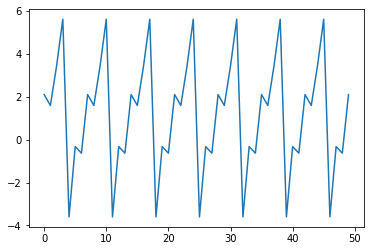

In [5]:
plt.plot(jnp.arange(50),seasonality)
plt.show()